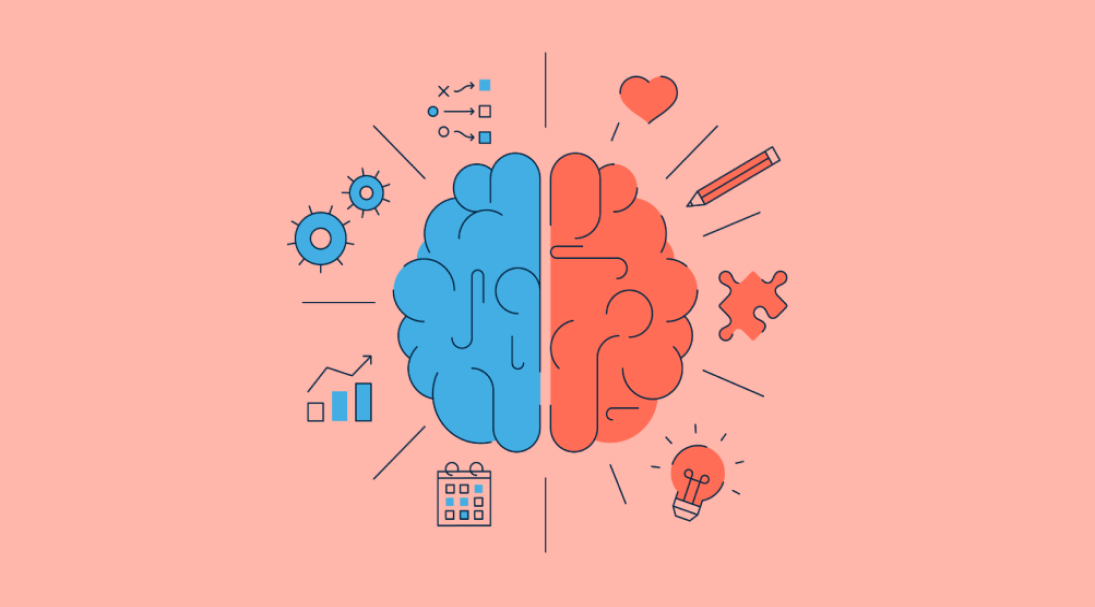
 </center>!

# Giriş

<font color = 'green'>
İçerik: 
    
1. [Kütüphaneler ve veri yükleme](#1)
1. [Ön işleme](#2)
     * [Genel kontroller](#3)
     * [Sınıflandırma işlemi](#4)
     * [Toplam yetenek sayısı](#5)
1. [Keşifçi veri analizi (EDA)](#6)
    * [Değişken sınırlandırma ve eksik veriler](#7)
    * [Kategorik değişken analizi](#8)
    * [Sayısal değişken analizi](#9)
1. [df_skill veri seti oluşturma](#10)

<a id = "1"></a><br>
# 1. Kütüphaneler ve veri yükleme

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline
color = '#2ca25f'
cmap1 = 'Greens'
cmap2 =  'Set3'
palette1 = 'Greens'
palette2 = 'Set3'

root = '/kaggle/input/garanti-bbva-data-camp/'
target = 'moved_after_2019'
idx = 'user_id'

In [2]:
df_skills = pd.read_csv(os.path.join(root, 'skills.csv'))
df_train = pd.read_csv(os.path.join(root, 'train_users.csv'))
df_test  = pd.read_csv(os.path.join(root, 'test_users.csv'))

df = pd.concat([df_train, df_test], axis=0)

<a id = "2"></a><br>
# 2. Ön işleme

<a id = "3"></a><br>
## 2.1 Genel kontroller

In [3]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398443 entries, 0 to 1398442
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1398443 non-null  int64 
 1   skill    1398443 non-null  object
dtypes: int64(1), object(1)
memory usage: 21.3+ MB


In [4]:
df_skills.head()

,user_id,skill
0,1,Mühendislik
1,1,Eğitim
2,2,Android
3,2,Java
4,2,3D Studio Max


In [5]:
df_skills['skill'].value_counts().head(20)

Java                    24360
JavaScript              24072
SQL                     23590
C#                      23422
HTML                    16872
CSS                     15109
C++                     14762
Microsoft SQL Server    14593
C                       14121
Microsoft Office        13854
Python                  13353
MySQL                   13320
Git                     12651
Linux                   11552
Software Development    10978
jQuery                  10497
ASP.NET                 10178
HTML5                    9380
.NET                     8963
ASP.NET MVC              8806
Name: skill, dtype: int64

In [6]:
df_skills = df_skills[df_skills['skill'] != "English"]
df_skills = df_skills[df_skills['skill'] != "İngilizce" ]

* English ve İngilizce seçeneği Language veri setinde ele alındığı için veri setinden çıkarılmıştır.

<a id = "4"></a><br>
## 2.2 Sınıflandırma işlemi

In [7]:
df_skills.loc[df_skills['skill'].str.contains("JavaScript|Java|java"), 'skill'] = "JAVA"
df_skills.loc[df_skills['skill'].str.contains("SQL|Sql|sql"), 'skill'] = "SQL"
df_skills.loc[df_skills['skill'].str.contains("HTML"), 'skill'] = "HTML"
df_skills.loc[df_skills['skill'].str.contains("C+|cplusplus|c+|C#"), 'skill'] = "C++"
df_skills.loc[df_skills['skill'].str.contains("Visual Studio"), 'skill'] = "VS"
df_skills.loc[df_skills['skill'].str.contains("Matlab"), 'skill'] = "MATLAB"

df_skills.loc[df_skills['skill'].str.contains("CSS|Bootstrap|jQuery|AngularJS|React.js|Angular|JSP|AJAX|Front-end|frontend"), 'skill'] = "FRONTEND"
df_skills.loc[df_skills['skill'].str.contains("ASP|.NET|PHP|php|Node.js|\#|Go|Spring Boot|Eclipse|backend"), 'skill'] = "BACKEND"
df_skills.loc[df_skills['skill'].str.contains("Database|MongoDB|Postgre|PL/|Oracle|Veritabanı|Hibernate|Veritabanları|Big Data|veritabanı|Mongo"), 'skill'] = "DATABASE"
df_skills.loc[df_skills['skill'].str.contains("OOP|Object|Nesne"), 'skill'] = "OOP"
df_skills.loc[df_skills['skill'].str.contains("Teamwork|Ekip Çalışması|İletişim|Team Motivation"), 'skill'] = "TEAMWORKER"
df_skills.loc[df_skills['skill'].str.contains("Yazılım Geliştirme|Software Development|Jenkins|Software Design|Maven|UML|TFS|JIRA|DevOps|Yazılım"), 'skill'] = "SOFTWARE_DEVELOPMENT"
df_skills.loc[df_skills['skill'].str.contains("Agile|AGILE"), 'skill'] = "AGILE"
df_skills.loc[df_skills['skill'].str.contains("Excel|Office|Word|PowerPoint"), 'skill'] = "MICROSOFT_OFFICE"
df_skills.loc[df_skills['skill'].str.contains("WEB|Web"), 'skill'] = "WEB"
df_skills.loc[df_skills['skill'].str.contains("Management|Yönetim|Lider|Leadership"), 'skill'] = "MANAGEMENT"
df_skills.loc[df_skills['skill'].str.contains("Machine Learning|Veri Bilimi|Veri Analizi|Algorithms|Analysis|Makine Öğrenimi|Algoritmalar|Yapay Zeka|Artificial|Doğal Dil İşleme|İstatistik|Neural Networks"), 'skill'] = "ML"
df_skills.loc[df_skills['skill'].str.contains("Programlama|Programming"), 'skill'] = "PROGRAMMING"
df_skills.loc[df_skills['skill'].str.contains("Android|mobil|MOBILE|Mobile|Mobil Uygulamalar|Flutter|React Native"), 'skill'] = "ANDROID"
df_skills.loc[df_skills['skill'].str.contains("Framework|WCF|Django"), 'skill'] = "FRAMEWORK"
df_skills.loc[df_skills['skill'].str.contains("Unity|GAME|game"), 'skill'] = "GAME_DEV"
df_skills.loc[df_skills['skill'].str.contains("Araştırma|Research"), 'skill'] = "RESEARCH"
df_skills.loc[df_skills['skill'].str.contains("Mühendislik|Engineering"), 'skill'] = "ENGINEERING"
df_skills.loc[df_skills['skill'].str.contains("Embedded Systems|Microservices|AutoCAD|Arduino|SolidWorks|hardware|Donanım"), 'skill'] = "HARDWARE_SKILLS"
df_skills.loc[df_skills['skill'].str.contains("Problem Solving|Sorun Çözme"), 'skill'] = "PROBLEM_SOLVING"
df_skills.loc[df_skills['skill'].str.contains("Server|Tomcat|Docker|Redis|sunucu"), 'skill'] = "SERVER"
df_skills.loc[df_skills['skill'].str.contains("CLOUD|Cloud Computing|bulut|Kubernetes"), 'skill'] = "CLOUD"
df_skills.loc[df_skills['skill'].str.contains("PYTHON|Python|py|Pandas|Numpy"), 'skill'] = "PYTHON"
df_skills.loc[df_skills['skill'].str.contains("Git|github|GITHUB"), 'skill'] = "GITHUB"
df_skills.loc[df_skills['skill'].str.contains("Linux|LINUX"), 'skill'] = "LINUX"
df_skills.loc[df_skills['skill'].str.contains("Photoshop|Photo|Adobe|DESIGN|design|illustrator|3D|Grafik|Tasarım|Design"), 'skill'] = "DESIGNER"
df_skills.loc[df_skills['skill'].str.contains("Networking|network"), 'skill'] = "NETWORKING"
df_skills.loc[df_skills['skill'].str.contains("ECONOMY|PAYMENT|Payment|economy|ekonomi"), 'skill'] = "ECONOMY"
df_skills.loc[df_skills['skill'].str.contains("FINANCE|Finance|Finans|satış|finans|pazarlama|Sales"), 'skill'] = "FINANCE"
df_skills.loc[df_skills['skill'].str.contains("Testing|test|TEST|Manuel Test Etme"), 'skill'] = "TEST"
df_skills.loc[df_skills['skill'].str.contains("Siber Güvenlik|Siber|cybersecurity|security|5C|Güvenliği"), 'skill'] = "CYBERSECURITY"
df_skills.loc[df_skills['skill'].str.contains("iOS|ios|IOS"), 'skill'] = "IOS"
df_skills.loc[df_skills['skill'].str.contains("Marketing"), 'skill'] = "MARKETING"

* https://www.kaggle.com/code/zeynepozisil/eda-for-garanti-bbva-data-camp kaynağından yaralanılmıştır. İlk 6 değer farklı ele alınmıştır.

In [8]:
df_skills.loc[~df_skills["skill"].isin(["JAVA","SQL","HTML","C++","PROJECT_MANAGEMENT","VS","MATLAB",
                                        "FRONTEND","BACKEND","DATABASE","OOP","TEAMWORKER","SOFTWARE_DEVELOPMENT","AGILE", 
                                       "MICROSOFT_OFFICE","WEB","MANAGEMENT","ML","PROGRAMMING","ANDROID","FRAMEWORK","GAME_DEV", 
                                       "RESEARCH","ENGINEERING","HARDWARE_SKILLS","PROBLEM_SOLVING","SERVER","CLOUD","PYTHON", 
                                       "GITHUB","LINUX","DESIGNER","NETWORKING","ECONOMY","FINANCE","TEST",
                                       "CYBERSECURITY","IOS","MARKETING"]), "skill"] = "OtherSkill"

* Yukarda liste halinde düzeltilen değerler dışındakiler OtherSkill olarak sınıflandırıldı.

In [9]:
df_skills = df_skills[df_skills['skill'] != "OtherSkill" ]

* OtherSkill değerleri yaygın olan özelliklere odaklanmak, değişken sayısını azaltmak amacıyla çıkarıldı.

In [10]:
df_skills['skill'].value_counts().head(15)

C++                     439318
SQL                      75473
JAVA                     56244
SOFTWARE_DEVELOPMENT     46686
BACKEND                  44166
MANAGEMENT               37167
FRONTEND                 28660
HTML                     28536
WEB                      21132
DESIGNER                 20742
ANDROID                  18172
ML                       17605
DATABASE                 17495
GITHUB                   15370
PYTHON                   14308
Name: skill, dtype: int64

* Veri setindeki yetenekler incelendiğinde Bilgisayar ve Web yeteneklerinin ağırlıkta olduğunu söyleyebiliriz. 
* Ek olarak yönetim yeteneklerinin de ağırlığından söz edebiliriz.

In [11]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029715 entries, 0 to 1398442
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1029715 non-null  int64 
 1   skill    1029715 non-null  object
dtypes: int64(1), object(1)
memory usage: 23.6+ MB


In [12]:
df_skills = df_skills.drop_duplicates(['user_id', 'skill'])
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463912 entries, 0 to 1398440
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  463912 non-null  int64 
 1   skill    463912 non-null  object
dtypes: int64(1), object(1)
memory usage: 10.6+ MB


* 565.803 çoklanan değer silindi.

<a id = "5"></a><br>
## 2.3 Toplam yetenek sayısı

In [13]:
df_totalskills = df_skills.pivot_table(index='user_id',values='skill',aggfunc='nunique')
df_totalskills.columns = ['TOTALSKILL']
df_totalskills.head()

,TOTALSKILL
user_id,
1,1
2,4
3,3
5,7
6,4


<a id = "6"></a><br>
# 3. Keşifçi veri analizi (EDA)

In [14]:
df_skills2 = df_skills.merge(df, on="user_id", how="left")
df_skills2 = df_skills2.merge(df_totalskills, on="user_id", how="left")
df_skills2.drop(columns=["industry","location"], inplace = True)

df_skills2.head()

,user_id,skill,moved_after_2019,TOTALSKILL
0,1,ENGINEERING,NaN,1
1,2,ANDROID,NaN,4
2,2,JAVA,NaN,4
3,2,DESIGNER,NaN,4
4,2,C++,NaN,4


<a id = "7"></a><br>
## 3.1 Değişken sınırlandırma ve eksik veriler

In [15]:
df_skills2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463912 entries, 0 to 463911
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           463912 non-null  int64  
 1   skill             463912 non-null  object 
 2   moved_after_2019  371171 non-null  float64
 3   TOTALSKILL        463912 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 17.7+ MB


* İncelenecek değişkenlerde eksik gözlem bulunmamaktadır.

In [16]:
cat_cols = ['skill']
num_cols = ['TOTALSKILL']

<a id = "8"></a><br>
## 3.2 Kategorik değişken analizi

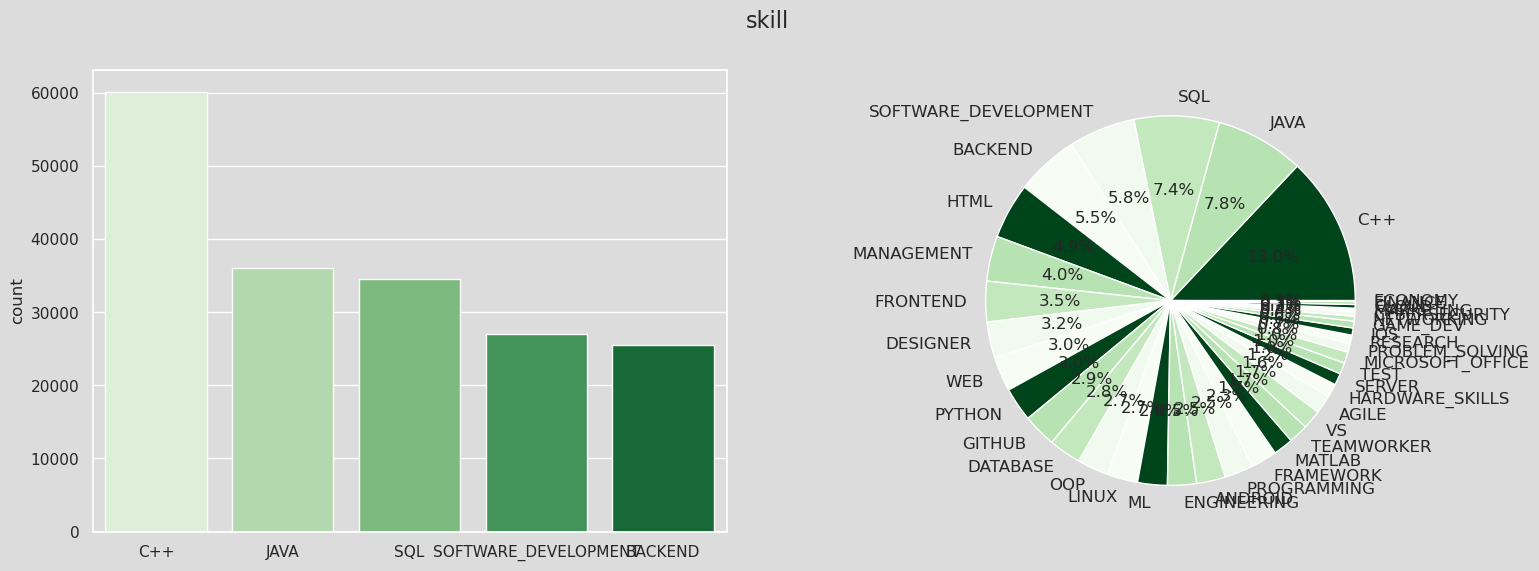

In [17]:
def cat_analyser(data, col, freq_limit = 5):
    df_ = data.copy()
    sns.set(rc = {'axes.facecolor': 'gainsboro',
                  'figure.facecolor': 'gainsboro'})
    if df_[col].nunique() > freq_limit:
        df_ = df_.loc[df_[col].isin(df_[col].value_counts(). \
                                    keys()[:freq_limit].tolist())]
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
    fig.suptitle(col, fontsize = 16)
    sns.countplot(data = df_,
                  x = col,
                  ax = ax[0],
                  palette= palette1,
                  order =  df_[col].value_counts().index)
    ax[0].set_xlabel('')
    pie_cmap = plt.get_cmap(cmap1)
    normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)) 
    data[col].value_counts().plot.pie(autopct = '%1.1f%%',
                                      textprops = {'fontsize': 12},
                                      ax = ax[1],
                                      colors = pie_cmap(normalize(df_[col].value_counts())))
    ax[1].set_ylabel('')
    plt.show()
    matplotlib.rc_file_defaults()
    sns.reset_orig()


for col in cat_cols:
    cat_analyser(df_skills2, col)

In [18]:
# Kategorik değişkenlerin hedef değişken ile analizi;
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    
for col in cat_cols:
    target_summary_with_cat(df_skills2,"moved_after_2019",col)

                      TARGET_MEAN
skill                            
AGILE                       0.446
ANDROID                     0.449
BACKEND                     0.408
C++                         0.397
CLOUD                       0.484
CYBERSECURITY               0.441
DATABASE                    0.414
DESIGNER                    0.406
ECONOMY                     0.324
ENGINEERING                 0.348
FINANCE                     0.340
FRAMEWORK                   0.426
FRONTEND                    0.403
GAME_DEV                    0.468
GITHUB                      0.482
HARDWARE_SKILLS             0.450
HTML                        0.432
IOS                         0.420
JAVA                        0.421
LINUX                       0.445
MANAGEMENT                  0.392
MARKETING                   0.335
MATLAB                      0.467
MICROSOFT_OFFICE            0.447
ML                          0.423
NETWORKING                  0.318
OOP                         0.425
PROBLEM_SOLVIN

<a id = "9"></a><br>
## 3.3 Sayısal değişken analizi

count   463912.000
mean         9.504
std          3.802
min          1.000
5%           3.000
10%          4.000
20%          6.000
30%          7.000
40%          8.000
50%          9.000
60%         11.000
70%         12.000
80%         13.000
90%         15.000
95%         16.000
99%         18.000
max         22.000
Name: TOTALSKILL, dtype: float64


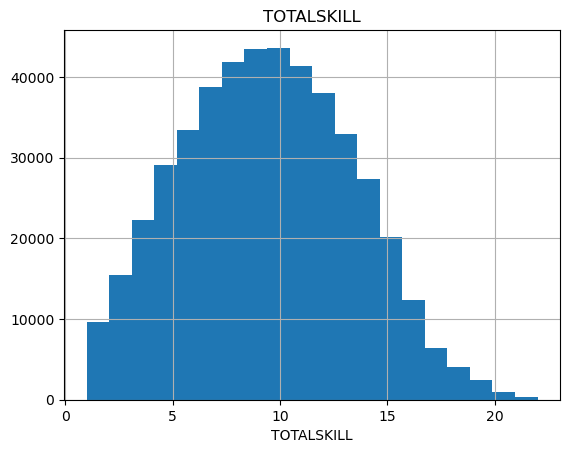

In [19]:
# Numerik değişken analizi
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()    

for col in num_cols:
    num_summary(df_skills2, col, True)

In [20]:
# Numerik değişkenlerin hedef değişken ile analizi;
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n\n")
    
for col in num_cols:
    target_summary_with_num(df_skills2, "moved_after_2019", col)

                  TOTALSKILL
moved_after_2019            
0.000                  9.229
1.000                  9.873




* Yaklaşık ortalama 9 üzeri yeteneğe sahip kişilerin 2019 yılında iş değiştirdiğini söyleyebiliriz.

<a id = "10"></a><br>
# 4. df_skill veri seti oluşturma

In [21]:
df_skill = df_skills
df_skill.head()

,user_id,skill
0,1,ENGINEERING
2,2,ANDROID
3,2,JAVA
4,2,DESIGNER
6,2,C++


In [22]:
df_skill['have'] = True
df_skill = df_skill.drop_duplicates(['user_id', 'skill'])
df_skill = pd.pivot(df_skill, index='user_id', columns='skill', values='have')
df_skill = df_skill.fillna(0).astype(int)
df_skill.head()

skill,AGILE,ANDROID,BACKEND,C++,CLOUD,CYBERSECURITY,DATABASE,DESIGNER,ECONOMY,ENGINEERING,FINANCE,FRAMEWORK,FRONTEND,GAME_DEV,GITHUB,HARDWARE_SKILLS,HTML,IOS,JAVA,LINUX,MANAGEMENT,MARKETING,MATLAB,MICROSOFT_OFFICE,ML,NETWORKING,OOP,PROBLEM_SOLVING,PROGRAMMING,PYTHON,RESEARCH,SERVER,SOFTWARE_DEVELOPMENT,SQL,TEAMWORKER,TEST,VS,WEB
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [23]:
df_skill = df_skill.merge(df_totalskills, on="user_id", how="left")

df_skill.head()

,AGILE,ANDROID,BACKEND,C++,CLOUD,CYBERSECURITY,DATABASE,DESIGNER,ECONOMY,ENGINEERING,FINANCE,FRAMEWORK,FRONTEND,GAME_DEV,GITHUB,HARDWARE_SKILLS,HTML,IOS,JAVA,LINUX,MANAGEMENT,MARKETING,MATLAB,MICROSOFT_OFFICE,ML,NETWORKING,OOP,PROBLEM_SOLVING,PROGRAMMING,PYTHON,RESEARCH,SERVER,SOFTWARE_DEVELOPMENT,SQL,TEAMWORKER,TEST,VS,WEB,TOTALSKILL
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
5,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,4


* Yararlanılan kaynaklar;

            * https://www.kaggle.com/code/zeynepozisil/eda-for-garanti-bbva-data-camp
            * https://www.kaggle.com/code/greysky/randomforest-baseline
            
* Diğer veri seti incelemeleri için;
            
            * Language : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-language
            * Education : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-education
            * Experience : https://www.kaggle.com/code/muratcakmak/preprocessing-eda-experience